Accident's Dataset Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object') 

Vehicle's Dataset Columns:
 Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Drive

1     1092350
2      318059
3      102845
4       38506
5       14976
6        6037
7        2168
8         986
9         453
10        248
11        163
12         96
13         84
14         50
70         44
16         40
36         28
26         21
17         16
15         15
18          7
19          7
21          6
24          4
87          4
43          4
22          4
29          3
42          3
25          2
40          2
38          2
27          2
41          1
32          1
58          1
62          1
20          1
23          1
93          1
Name: number_of_casualties, dtype: int64

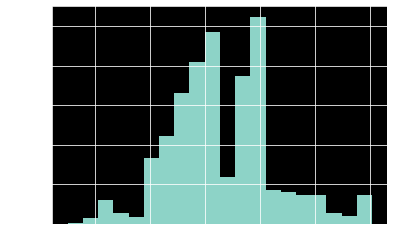

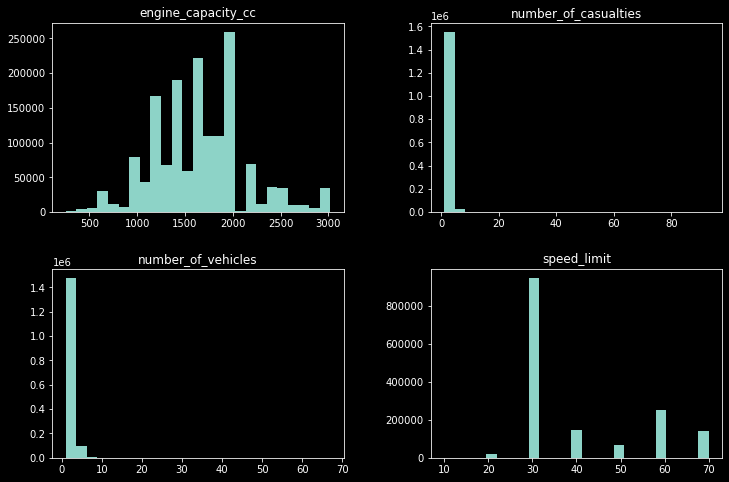

In [1]:

#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import time
import timeit

import matplotlib.pyplot as plt
plt.style.use('dark_background')
get_ipython().run_line_magic('matplotlib', 'inline')

import datetime
import math
from collections import Counter

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

#for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

#time series
import statsmodels.api as sm
from pylab import rcParams
import itertools

#warning ignorer
import warnings
warnings.filterwarnings("ignore")


# In[8]:


#import files
a_data = pd.read_csv('Accident_Information.csv', delimiter=',', quotechar='"')
v_data = pd.read_csv('Vehicle_Information.csv', delimiter=',', quotechar='"', encoding= 'unicode_escape')


# In[17]:


v_data.head()


# In[10]:


# display the length of latitude column to start with feature engineering 
len(a_data['Latitude'])


# # Feature Engineering

# Below is the code for creating the extra features in our dataset to fulfil the project demand. In the code, we have generated extra features based on existing attributes called 'Latitude' and 'Longitude'. We are further planning to also generate even more features based on age and vehicle type involved in the accident. This is only for having a large amount of data and using it for further predictions. 

# In[12]:


label_encoder = LabelEncoder()
n_bins = 15
x = label_encoder.fit_transform(pd.cut(a_data['Latitude'], n_bins, retbins=True)[0])
y = label_encoder.fit_transform(pd.cut(a_data['Longitude'], n_bins, retbins=True)[0])
z = []
ar = []
for i in range(len(x)):
    z.append("Area"+str(x[i] + 16*y[i]))
    ar.append(x[i] + 16*y[i])
areas = pd.DataFrame(z,columns=["Area"])


# In[16]:


one_hot = pd.get_dummies(areas["Area"])


# In[15]:


# this is for handling the error or exception
for i in range(0,256):
    try:
        one_hot["Area"+str(i)]
    except KeyError:
        one_hot["Area"+str(i)] = 0


# In[ ]:


#a_data = a_data.join(one_hot)


# In[18]:

a_data.head()


# # Cleaning and dataframing for accident column

# In[37]:


df=pd.DataFrame(a_data)


# Below code is to clear the data from 'Accident Information Dataset' and shape its parameters for further analysis  

# In[38]:


a_data['Road_Type'] != "Unknown" 
a_data['Junction_Control'] != "Data missing or out of range"
a_data['Carriageway_Hazards'] != "Data missing or out of range" 
a_data['Junction_Detail'] != "Data missing or out of range" 
a_data['Road_Surface_Conditions'] != "Data missing or out of range" 
a_data['Special_Conditions_at_Site'] != "Data missing or out of range"
a_data['Weather_Conditions'] != "Data missing or out of range" 
a_data['Latitude'].notnull()
a_data['Longitude'].notnull()


# In[39]:


a_data


# Below code is to clear the data from 'Vehicle Information Dataset' and shape its parameters for further analysis  

# In[40]:


#Cleaning for vehicles column

v_data['Driver_Home_Area_Type'] != "Data missing or out of range"
v_data['Journey_Purpose_of_Driver'] != "Data missing or out of range"
v_data['Junction_Location'] != "Data missing or out of range"
v_data['Was_Vehicle_Left_Hand_Drive'] != "Data missing or out of range"
v_data['Hit_Object_in_Carriageway'] != "Data missing or out of range"
v_data['Skidding_and_Overturning'] != "Data missing or out of range"
v_data['Towing_and_Articulation'] != "Data missing or out of range"
v_data['Vehicle_Leaving_Carriageway'] != "Data missing or out of range"
v_data['Vehicle_Manoeuvre'] != "Data missing or out of range"
v_data['Vehicle_Type'] != "Data missing or out of range"
v_data['X1st_Point_of_Impact'] != "Data missing or out of range"
v_data['Sex_of_Driver'] != "Data missing or out of range"
v_data['Age_Band_of_Driver'] != "Data missing or out of range"
        
  


# In[42]:


#check columns
print("Accident's Dataset Columns:\n",a_data.columns, "\n")


print("Vehicle's Dataset Columns:\n",v_data.columns)


# In[43]:


print('Accident Dataset Shape', a_data.shape)
print('Vehicle Dataset Shape', v_data.shape)


# In[48]:


df1=pd.DataFrame(a_data)
df1['Area'] = ar
df2=pd.DataFrame(v_data)


# In[ ]:


#merge datasets
df = pd.merge(df1,df2)


# In[ ]:


#check columns
print("Names of Combined Columns:\n",df.columns, "\n")
print("\nShape:\n",df.shape)


# In[ ]:


df.describe(include ='all')


# # Data Cleaning

# In[ ]:


#check corr b/t Location_Easting_OSGR & Location_Northing_OSGR AND Longitude and Latitude

print(df['Location_Easting_OSGR'].corr(df['Longitude']))


print(df['Location_Northing_OSGR'].corr(df['Latitude']))


# In[ ]:


#drop Location_Easting_OSGR & Location_Northing_OSGR
#because they are the similar to Latitude and Longitude 

df = df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)


# In[ ]:


df.shape


# In[ ]:


#standardize all column names to lowercase, and remove some characters 
#for ease of use in querying
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')


# In[ ]:


#convert date/time to datetime datatype

df['date'] = pd.to_datetime((df['date']), format= "%Y-%m-%d")


# In[ ]:


#df.dtypes


# In[ ]:


#mistyped datatypes

df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number','driver_imd_decile',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']]= df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number','driver_imd_decile',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']].astype('object')


# In[ ]:


df.columns.to_series().groupby(df.dtypes).groups


# In[ ]:


df.columns.to_series().groupby(df.dtypes).groups


# # Nulls and Outliers

# In[ ]:


df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100


# #### 2nd_road_class

# In[ ]:


# #2nd_road_class
df['2nd_road_class'].value_counts()/df.shape[0]*100


# With 40% of non null being unclassified and 39% of the overall 2nd_road_class column being null, We have decided to drop it in it's entirely.

# In[ ]:


df = df.drop(['2nd_road_class'], axis=1)


# #### driver_imd_decile

# In[ ]:


#driver_imd_decile
df['driver_imd_decile'].value_counts()/df.shape[0]*100


# Since the distribution of categories for 'driver_imd_decile seem very similar, We've decided not to use the mode but "method='ffill'"

# In[ ]:


df['driver_imd_decile'].fillna(method='ffill', inplace=True)


# #### age_of_vehicle

# In[ ]:


df['age_of_vehicle'].describe()


# In[ ]:


df['age_of_vehicle'].median()


# Changing the nulls of "age of vehicle" to median, then creating it as a category

# In[ ]:


df['age_of_vehicle'].fillna(7, inplace=True)

#group age_of_vehicle
#1=0-3, 2=3-5, 3=5-8, 4=8-11, 5=
def fixedvehicleage(age):
    if age>=0 and age<=120:
        return age
    else:
        return np.nan

df['age_of_vehicle'] = df['age_of_vehicle'].apply(fixedvehicleage)


df['age_of_vehicle'] = pd.cut(df['age_of_vehicle'], 
                             [0,2,5,8,11,14,17,120], labels=['1', '2', '3','4','5','6','7'])


# #### Model

# In[ ]:


#model
df['model'].value_counts()/df.shape[0]*100


# In[ ]:


df['model'].describe()


# Knowing the number of unique models for the model column I have decided to use the ffill method on it as well.

# In[ ]:


df['model'].fillna(method='ffill', inplace=True) 


# Note: A lot of the values of "model' are labeled as "missing". We do not want to change these because the model could have actually been missing from the car from the accident or it could not be recognizable at the time of the accident.

# #### engine_capacity_cc

# In[ ]:


#engine_capacity_cc
df['engine_capacity_cc'].describe()


# We will be handling both outliers and the null values of engine_capacity_cc using the ideals of quantiles and the interquartile range (IQR).

# In[ ]:


#first we are going to handle both ends of outliers.
#(determine the min and max cuttoffs for detecting the outlier)
q75, q25 = np.percentile(df['engine_capacity_cc'].dropna(), [75 ,25])
iqr = q75 - q25
 
ecmin = q25 - (iqr*1.5)
ecmax = q75 + (iqr*1.5)

print(ecmax)
print(ecmin)


# To explain, what I am going to do is use the ecmax number for the maximum engine_capacity_cc and ecmin for my engine_capacity_cc. Then I'm going to take the mean of those and use it as my fillna.

# In[ ]:


df = df[df['engine_capacity_cc']<=ecmax]


# In[ ]:


df = df[df['engine_capacity_cc']>=ecmin]


# In[ ]:


df['engine_capacity_cc'].hist(bins=20)
plt.style.use('dark_background')


# We can accept this distribution and will now check and handle their nulls

# In[ ]:


#check values of 'engine_capacity_cc'
df['engine_capacity_cc'].describe()


# Below code is to round this mean value

# In[ ]:


df['engine_capacity_cc'].mean()


# In[ ]:


df['engine_capacity_cc'].fillna(1652, inplace=True)


# In[ ]:


df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100


# Note: After doing the above null fixes, propulsion_code dropped from having 10% null values to 0. (see below). I will continue on and fix lsoa_of_accident_location then drop the rest of the null values with are all <5%.

# In[ ]:


df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100


# #### lsoa_of_accident_location

# In[ ]:


# #lsoa_of_accident_location
df['lsoa_of_accident_location'].value_counts()


# In[ ]:


df['lsoa_of_accident_location'].describe()


# With numerous unique variable and a high count amount the top variables we are deciding to do ffill again.

# In[ ]:


df['lsoa_of_accident_location'].fillna(method='ffill', inplace=True)


# In[ ]:


#### Check nulls for again
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100


# Dropping the remaining nulls that are <1%.

# In[ ]:


#drop the remaining nulls that are <1%
df.dropna(inplace=True)

#last check
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100


# In[ ]:


df.shape


# In[ ]:


df.info()


# #### More outliers, categorizing, and other cleanup

# In[ ]:


#detecting outliers of numerical columns (all floats/ints excluding lat/long and year)

df_num = df[['engine_capacity_cc','number_of_casualties','number_of_vehicles','speed_limit']]


# In[ ]:


df_num.hist( bins=25, grid=False, figsize=(12,8))
plt.style.use('dark_background')


# In[ ]:


# #number_of_casualties
df['number_of_casualties'].value_counts()


# In[ ]:





# In[ ]:





# In[ ]:






In [7]:
df = df.drop(columns=['longitude', 'latitude'])

In [8]:
class_data = df[['accident_severity']].copy()

In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown='ignore')

In [10]:
enc2 = OrdinalEncoder(handle_unknown='ignore')
enc2.fit(class_data)
enc_class_data = enc2.transform(class_data)

In [11]:
#print(enc_cat_data.shape)
class_df = pd.DataFrame(data=enc_class_data, columns=['label'])

In [49]:
df_slight = df[df.accident_severity =='Slight']
df_serious = df[df.accident_severity =='Serious']
df_fatal = df[df.accident_severity == 'Fatal']

In [55]:
print(df_slight['accident_severity'].count())
print(df_serious['accident_severity'].count())
print(df_fatal['accident_severity'].count())

1363929
193604
19709


In [ ]:
####### DATA READY #######

In [177]:
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    class_df,test_size=0.2, 
                                                    random_state=6)

In [178]:
X_train['accident_severity'].value_counts()  ### Highly skewed training data

Slight     1091130
Serious     154888
Fatal        15775
Name: accident_severity, dtype: int64

<AxesSubplot:>

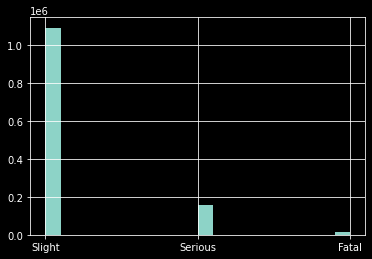

In [199]:
X_train['accident_severity'].hist(bins=20)

In [179]:
X_train_fatal = X_train[X_train['accident_severity'] == 'Fatal']
X_train_slight = X_train[X_train['accident_severity'] == 'Slight']
X_train_serious = X_train[X_train['accident_severity'] == 'Serious']

In [180]:
## Resample to avoid imbalance ##
from sklearn.utils import resample
X_train_slight_resample = resample(X_train_slight, replace=False, n_samples=200000, random_state=5)
#X_train_serious_resample = resample(X_train_serious, replace=False, n_samples=80000, random_state=15)
X_train_usampled = pd.concat([X_train_slight_resample, X_train_serious, X_train_fatal])
y_train_dec = X_train_usampled[['accident_severity']].copy()
enc2 = OrdinalEncoder(handle_unknown='ignore')
enc2.fit(y_train_dec)
enc_y_train = enc2.transform(y_train_dec)
y_train = pd.DataFrame(data = enc_y_train, columns=['labels'])
X_train_final = X_train_usampled.drop('accident_severity', axis=1)
enc.fit(X_train_final)
enc_cat_data = enc.transform(X_train_final)
X_train_conv = pd.DataFrame(data=enc_cat_data, columns=X_train_final.columns)

In [181]:
X_test = X_test.drop('accident_severity', axis=1)
#enc.fit(X_test_cat)
enc_cat_data_test = enc.transform(X_test)
X_test_conv = pd.DataFrame(data=enc_cat_data_test, columns=X_test.columns)

In [200]:
print(X_test_conv.shape)
print(X_train_conv.shape)

(315449, 51)
(370663, 51)


# Naive Bayes classifier

In [182]:
from sklearn.naive_bayes import CategoricalNB
naive_bayes = CategoricalNB()
naive_bayes.fit(X_train_conv,y_train)

CategoricalNB()

In [183]:
predict_cat = naive_bayes.predict(X_test_conv)
naive_bayes.score(X_test_conv, y_test)

0.7151647334434409

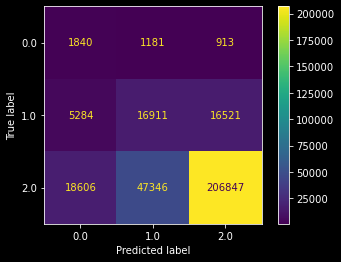

In [184]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(naive_bayes, X_test_conv, y_test) 

In [142]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(naive_bayes, X_test_conv, y_test)
print(imps.importances_mean)

[ 7.08830905e-04 -1.51910451e-03 -3.98796636e-03 -2.14044109e-03
 -1.19195179e-04  5.76955387e-04  1.20463213e-05 -1.47091923e-03
 -5.04487255e-03 -5.42528269e-03  7.51310037e-04 -7.55874959e-03
 -7.69633126e-03 -2.33064616e-03 -8.78113419e-04  1.86083963e-03
 -2.09225580e-05 -2.13917305e-03 -5.82788343e-03 -2.75163339e-04
 -2.23237354e-03  2.57410865e-04 -3.72865344e-03  9.97308598e-04
 -4.70820957e-03 -2.32050189e-04 -2.76431372e-04 -3.48709300e-05
 -3.16120831e-03 -8.62897013e-04  1.15391077e-04 -7.03124752e-04
 -3.91822450e-04  2.46442373e-03  9.44685195e-05  1.76003094e-03
 -1.69916532e-04 -4.68601898e-03  2.28499694e-03  1.42273394e-03
  1.74988667e-04  7.09464921e-04  1.72452599e-03 -2.59946933e-05
  1.50135204e-03 -4.94533189e-05 -2.61848984e-04 -5.70615218e-04
  3.40213473e-03 -2.53606764e-06  6.03584098e-04]


In [21]:
X_test_conv.shape

(315449, 51)

In [147]:
indices = np.argsort(imps.importances_mean)[::-1]
print(indices.shape)
print("Feature ranking:")

for f in range(X_test_conv.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], imps.importances_mean[indices[f]]))

(51,)
Feature ranking:
1. vehicle_type (0.003402)
2. engine_capacity_cc (0.002464)
3. make (0.002285)
4. number_of_vehicles (0.001861)
5. hit_object_off_carriageway (0.001760)
6. skidding_and_overturning (0.001725)
7. vehicle_leaving_carriageway (0.001501)
8. model (0.001423)
9. time (0.000997)
10. light_conditions (0.000751)
11. sex_of_driver (0.000709)
12. accident_index (0.000709)
13. x1st_point_of_impact (0.000604)
14. date (0.000577)
15. special_conditions_at_site (0.000257)
16. propulsion_code (0.000175)
17. age_of_vehicle (0.000115)
18. hit_object_in_carriageway (0.000094)
19. day_of_week (0.000012)
20. was_vehicle_left_hand_drive (-0.000003)
21. pedestrian_crossing-human_control (-0.000021)
22. towing_and_articulation (-0.000026)
23. inscotland (-0.000035)
24. vehicle_locationrestricted_lane (-0.000049)
25. carriageway_hazards (-0.000119)
26. journey_purpose_of_driver (-0.000170)
27. weather_conditions (-0.000232)
28. vehicle_manoeuvre (-0.000262)
29. road_surface_conditions (-

# KNN classifier

In [185]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
#random_state=17)

knn = KNeighborsClassifier(n_neighbors=9)

#tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_conv)
X_test_scaled = scaler.transform(X_test_conv)

#knn.fit(X_train_scaled, y_train)

In [186]:
## Dimensionality reduction for knn
pca = PCA(n_components=10)
pca.fit(X_train_scaled)
X_train_red = pca.fit_transform(X_train_scaled)
X_test_red = pca.fit_transform(X_test_scaled)

In [187]:
## Fit KNN ###
knn.fit(X_train_red, y_train)
knn_predict = knn.predict(X_test_red)

In [188]:
print (f" Accuracy for k-nn is {accuracy_score(y_test, knn_predict)}")

 Accuracy for k-nn is 0.5810986879020064


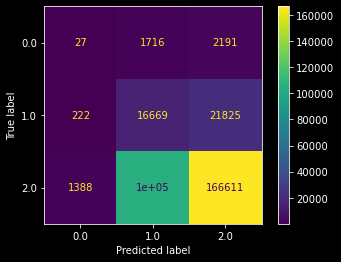

In [189]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test_red, y_test)

In [190]:
## Trying with differnt k values ##
knn3 = KNeighborsClassifier(n_neighbors=3)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn9 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train_red, y_train)
knn7.fit(X_train_red, y_train)
knn9.fit(X_train_red, y_train)

knn_predict3 = knn3.predict(X_test_red)
knn_predict7 = knn7.predict(X_test_red)
knn_predict9 = knn9.predict(X_test_red)

In [191]:
print (f" Accuracy for k-nn with k = 3 is {accuracy_score(y_test, knn_predict3)}")
print (f" Accuracy for k-nn with k = 7 is {accuracy_score(y_test, knn_predict7)}")
print (f" Accuracy for k-nn with k = 9 is {accuracy_score(y_test, knn_predict9)}")

 Accuracy for k-nn with k = 3 is 0.5442306046302254
 Accuracy for k-nn with k = 7 is 0.5726187117410422
 Accuracy for k-nn with k = 9 is 0.5575259392167989


In [192]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn11 = KNeighborsClassifier(n_neighbors=11)
knn1.fit(X_train_red, y_train)
knn11.fit(X_train_red, y_train)

knn_predict1 = knn1.predict(X_test_red)
knn_predict11 = knn11.predict(X_test_red)

In [193]:
print (f" Accuracy for k-nn with k = 1 is {accuracy_score(y_test, knn_predict1)}")
print (f" Accuracy for k-nn with k = 11 is {accuracy_score(y_test, knn_predict11)}")

 Accuracy for k-nn with k = 1 is 0.5307165342099673
 Accuracy for k-nn with k = 11 is 0.5870140656651313


In [194]:
knn17 = KNeighborsClassifier(n_neighbors=17)
knn21 = KNeighborsClassifier(n_neighbors=21)
knn17.fit(X_train_red, y_train)
knn21.fit(X_train_red, y_train)

knn_predict17 = knn1.predict(X_test_red)
knn_predict21 = knn11.predict(X_test_red)

In [195]:
print (f" Accuracy for k-nn with k = 17 is {accuracy_score(y_test, knn_predict17)}")
print (f" Accuracy for k-nn with k = 21 is {accuracy_score(y_test, knn_predict21)}")

 Accuracy for k-nn with k = 17 is 0.5307165342099673
 Accuracy for k-nn with k = 21 is 0.5870140656651313


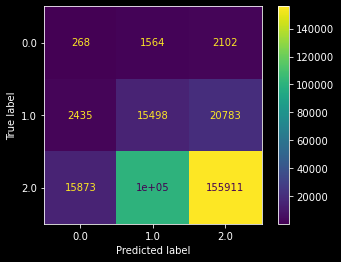

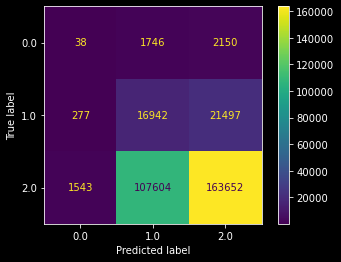

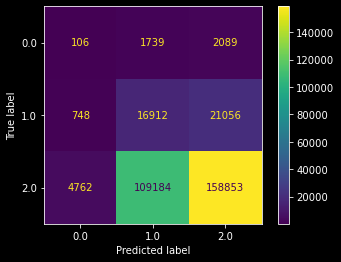

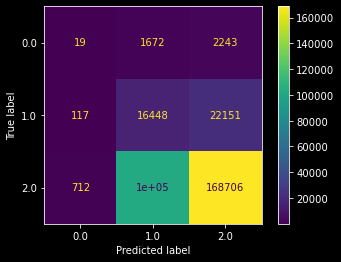

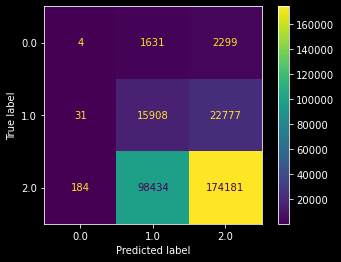

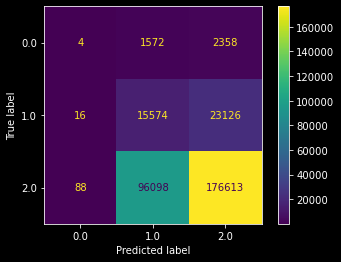

In [196]:
plot_confusion_matrix(knn3, X_test_red, y_test) 
plot_confusion_matrix(knn7, X_test_red, y_test) 
plot_confusion_matrix(knn9, X_test_red, y_test) 
plot_confusion_matrix(knn11, X_test_red, y_test) 
plot_confusion_matrix(knn17, X_test_red, y_test) 
plot_confusion_matrix(knn21, X_test_red, y_test) 

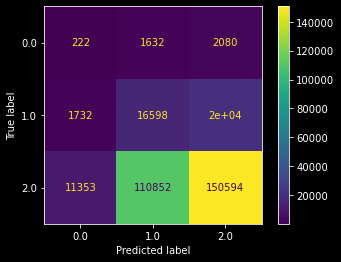

In [201]:
plot_confusion_matrix(knn1, X_test_red, y_test)

In [ ]:
######## END ##########